In [1]:
# 1. Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
#  3. First look at its main features (head, shape, info)
display(customer_df.shape)
display(customer_df.isnull().sum())

(9134, 24)

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = customer_df.columns.str.replace(' ', '_')

In [5]:
customer_df.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# 5. Change effective to date column to datetime format.
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

In [7]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
# 6. Define a function that differentiates between continuous and discrete variables. 
#Hint: The number of unique values might be useful. 
#Store continuous data into a continuous_df variable and do the same for discrete_df

nume_customer_df = customer_df.select_dtypes(include = np.number)

def discrete_continuous(df):
    discrete_col = []
    continuous_col = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_col.append(col)
        else:
            continuous_col.append(col)
            
    return (discrete_col, continuous_col)

discrete_col, continuous_col = discrete_continuous(nume_customer_df)

In [11]:
print(discrete_col)
print(continuous_col)

['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


In [12]:
discrete_df = nume_customer_df[['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 
                              'number_of_policies']]
continuous_df = nume_customer_df[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']]

In [13]:
# 7. Plot a correlation matrix, comment what you see.
display(discrete_df.corr())
display(continuous_df.corr())

'''Discrete variable has very low correlation between columns
For continuous variable there some values more correlated, but nothing really high'''

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
months_since_last_claim,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,0.005354,-0.001158,1.000000,0.001498
number_of_policies,0.009136,-0.013333,0.001498,1.000000


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.226451
income,0.024366,1.000000,-0.016665,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.632017
total_claim_amount,0.226451,-0.355254,0.632017,1.000000


'Discrete variable has very low correlation between columns\nFor continuous variable there some values more correlated, but nothing really high'

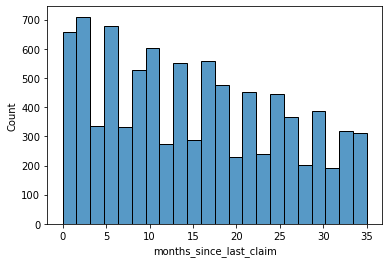

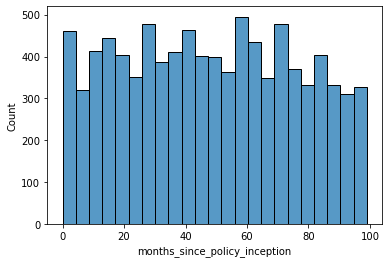

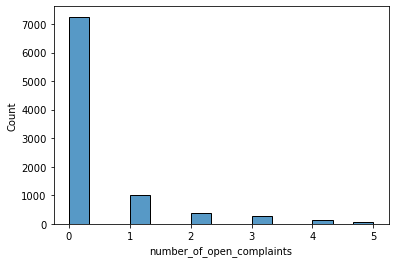

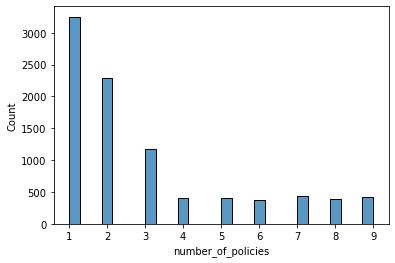

In [14]:
# 8. Create a function to plot every discrete variable. Do the same with the continuous variables 
#(Be Careful, you may need to change the plot type to one better suited for continuous data!
for i in discrete_df:
    sns.histplot(discrete_df[i])
    plt.show()

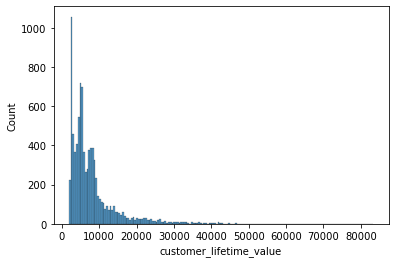

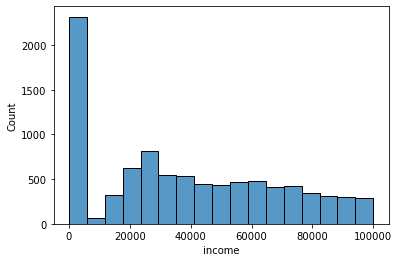

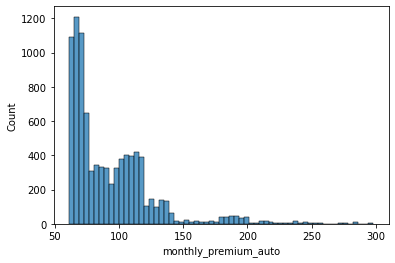

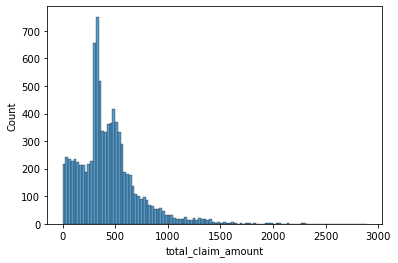

In [15]:
for i in continuous_df:
    sns.histplot(continuous_df[i])
    plt.show()

In [ ]:
# 9. Comment what you can see in the plots.
'''
            Discrete plots:
            
For months_since_last_claim plot values shows a linear negative tendency, the values are not symmetrical, but 
it seems like there are not outliers

Months_since_plicy_inception shows values in a similar range, as before,  there are not outliers. The plot
is near to symmetricality

number_of_open_complaints gets the majority of values at the beggining of the plot creating a pronounce skwe.

number_of_policies also shows a great amount of values concentrated in the first values followed by a tail that can´t be 
considered outliers.

The four first two plots and the two seconds behave in a similar way, none of them shows outliers but a big tail for some.
            
            Continuos plots:

customer_lifetime_value shows a huge skew and possibly an amount of outliers

income doesn´t show symmetricality but every value is consistent except for the beggining, that value could overrepresented
due to lack of information or just that values are 0

monthly_premuim_auto has great skew and tail 

total_claim_amount shows a plot a little bit more symmetrical but with a big tail at highest values. 

the four plots shows asymetry and tails, they should be checked out for outliers and treated to work with




C:\Users\guill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


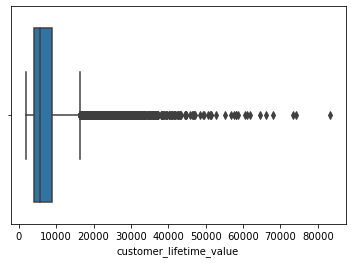

C:\Users\guill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


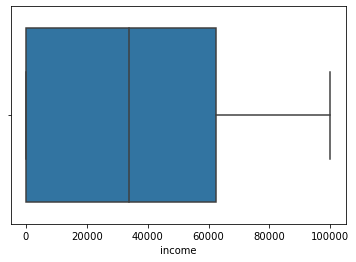

C:\Users\guill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


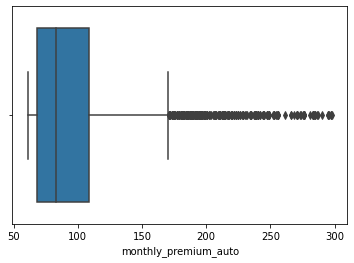

C:\Users\guill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


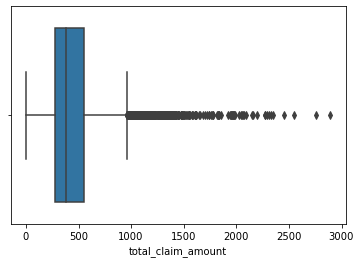

In [16]:
# 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

for i in continuous_df:
    sns.boxplot(continuous_df[i])
    plt.show()

In [17]:
# 11. Did you find outliers? Comment what you will do with them.
'''There are outliers in customer_lifetime_value and total_claim_amount '''

iqr = np.nanpercentile(continuous_df['customer_lifetime_value'],75) - np.nanpercentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.nanpercentile(continuous_df['customer_lifetime_value'],25) - 1.5*iqr

extra_points_up = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
extra_points_down = continuous_df[continuous_df['customer_lifetime_value'] > lower_limit]

print(len(extra_points_up))
len(extra_points_down)

817


9134

In [18]:
iqr = np.nanpercentile(continuous_df['total_claim_amount'],75) - np.nanpercentile(continuous_df['total_claim_amount'],25)
upper_limit_2 = np.nanpercentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
lower_limit_2 = np.nanpercentile(continuous_df['total_claim_amount'],25) - 1.5*iqr

extra_points_up_2 = continuous_df[continuous_df['total_claim_amount'] > upper_limit_2]
extra_points_down_2 = continuous_df[continuous_df['total_claim_amount'] > lower_limit_2]

print(len(extra_points_up_2))
len(extra_points_down_2)

453


9134

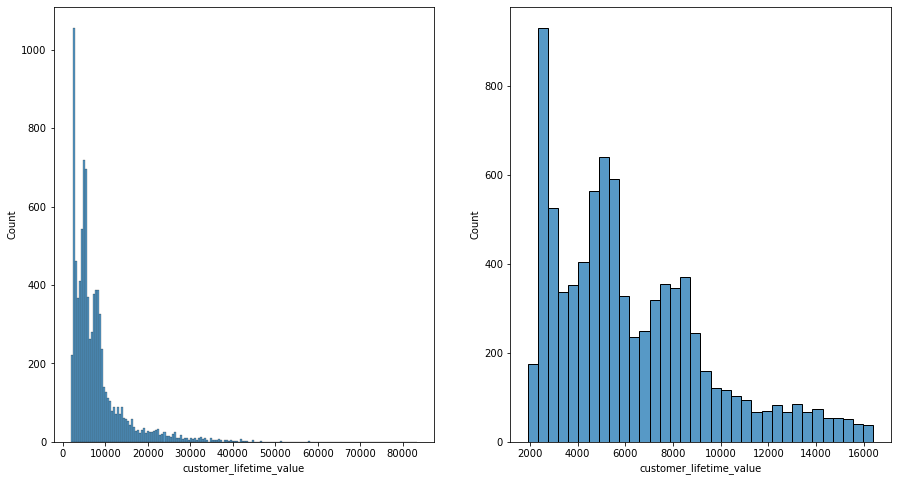

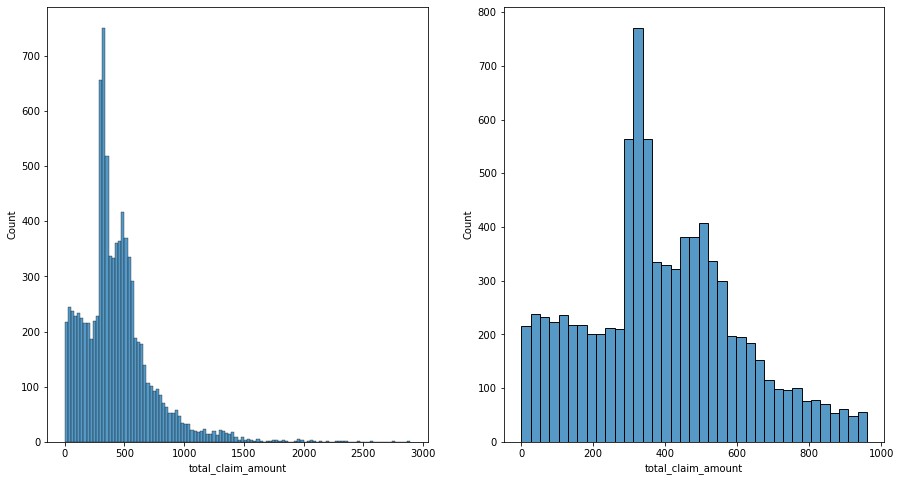

In [19]:
continuous_df_dropped = continuous_df[continuous_df['customer_lifetime_value'] <= upper_limit].copy()
continuous_df_dropped_2 = continuous_df[continuous_df['total_claim_amount'] <= upper_limit_2].copy()

fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.histplot(x = 'customer_lifetime_value', data = continuous_df, ax = ax[0])
sns.histplot(x = 'customer_lifetime_value', data = continuous_df_dropped, ax = ax[1])
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.histplot(x = 'total_claim_amount', data = continuous_df, ax = ax[0])
sns.histplot(x = 'total_claim_amount', data = continuous_df_dropped_2, ax = ax[1])
plt.show()

In [20]:
# 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.
nume_customer_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [21]:
cate_customer_df = customer_df.select_dtypes(include = object)
cate_customer_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64